<p style="background-color:dimgray;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:60px 20px;"><b>SVM & Decision Tree & Random Forest Project - Handwritten Digits Prediction</b></p>

<div style="text-align: center;">
    <img src="https://miro.medium.com/v2/resize:fit:1400/1*FL6DWzN-awxCaG8bS1ZD_Q.png" width="600" height="400"/>
</div>

**Contains:**

- [Importing Libraries](#import-library)
- [Loading The Dataset](#loading-dataset)
- [Understanding The Dataset & EDA](#eda)
- [Modeling](#modeling)
- [Comparing Models](#compare-models)
- [Final Model & Prediction](#final-model)
- [Conclusion](#conclusion)

<h1 style="color: dimgray;">Introduction</h1>

This project is a machine learning application aimed at classifying handwritten digits. Accurate recognition of handwritten digits by digital systems plays a crucial role in optical character recognition (OCR) technology, financial transactions, and educational applications. In this study, we analyzed the various features of handwritten digits and compared different machine learning algorithms. The goal is to identify the model that provides the highest accuracy and optimize the classification of digits. The dataset used consists of visual data and labels for handwritten digits.

<h1 id="import-library" style="color: dimgray;">Importing Libraries</h1>

In [1]:
!pip install skimpy

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from skimpy import skim
import missingno as msno
import cufflinks as cf

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.compose import make_column_transformer
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import make_scorer, precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
from yellowbrick.classifier import ClassPredictionError, ROCAUC

plt.rcParams["figure.figsize"] = (8,6)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

<h1 id="loading-dataset" style="color: dimgray;">Loading The Dataset</h1>

- This dataset is used for recognizing handwritten digits.

- The dataset contains scanned images of handwritten digits.

- It consists of 10 classes, where each class represents a digit between 0 and 9.

- Data was collected from 44 subjects, with 250 samples per subject.

- The dataset includes both the image data and the information about which digit each image represents.

- This dataset is commonly used to evaluate the performance of machine learning algorithms in handwriting recognition tasks.

- Additionally, it is a popular dataset for training deep learning models.


**Data reference links:**

1. [TUBITAK Article](https://journals.tubitak.gov.tr/cgi/viewcontent.cgi?article=3717&context=elektrik)
2. [UCI Machine Learning Repository: Pen-Based Recognition of Handwritten Digits Dataset](https://archive.ics.uci.edu/dataset/81/pen+based+recognition+of+handwritten+digits)

In [3]:
df0 = pd.read_csv("pendigits_txt.csv")
df = df0.copy()
df.head()

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16,class
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


In [4]:
df.sample(10)

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16,class
6522,88,85,100,100,60,75,26,48,0,19,34,0,80,18,30,30,6
9436,82,95,0,83,62,54,100,20,37,0,49,35,89,70,88,100,8
1300,30,83,60,100,100,86,67,60,94,43,75,14,27,0,0,16,3
10271,0,83,25,100,82,79,79,40,56,0,10,12,31,36,100,35,7
10229,0,67,44,83,93,100,100,92,83,70,68,46,66,23,73,0,1
10572,69,99,25,100,34,72,84,91,84,68,100,22,57,0,0,12,9
5437,100,100,54,80,25,54,0,29,0,2,75,0,89,18,19,31,6
7696,18,72,25,100,24,70,22,34,17,0,0,2,51,2,100,2,1
4586,80,100,29,84,0,47,7,8,79,7,100,41,30,35,20,0,6
367,25,76,45,100,77,66,57,25,9,3,0,7,53,6,100,0,2


<h1 id="eda" style="color: dimgray;">Understanding Data & EDA</h1>

In [5]:
df.shape

(10992, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10992 entries, 0 to 10991
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   input1   10992 non-null  int64
 1   input2   10992 non-null  int64
 2   input3   10992 non-null  int64
 3   input4   10992 non-null  int64
 4   input5   10992 non-null  int64
 5   input6   10992 non-null  int64
 6   input7   10992 non-null  int64
 7   input8   10992 non-null  int64
 8   input9   10992 non-null  int64
 9   input10  10992 non-null  int64
 10  input11  10992 non-null  int64
 11  input12  10992 non-null  int64
 12  input13  10992 non-null  int64
 13  input14  10992 non-null  int64
 14  input15  10992 non-null  int64
 15  input16  10992 non-null  int64
 16  class    10992 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
input1,10992.0,38.814320,34.257783,0.0,6.0,32.0,65.0,100.0
input2,10992.0,85.120269,16.218571,0.0,76.0,89.0,100.0,100.0
input3,10992.0,40.605622,26.342984,0.0,20.0,40.0,58.0,100.0
input4,10992.0,83.774199,19.163646,0.0,72.0,91.0,100.0,100.0
input5,10992.0,49.770378,34.100515,0.0,18.0,53.0,78.0,100.0
input6,10992.0,65.573144,26.996688,0.0,49.0,71.0,86.0,100.0
input7,10992.0,51.220251,30.576881,0.0,28.0,53.5,74.0,100.0
input8,10992.0,44.498999,29.906104,0.0,23.0,43.0,64.0,100.0
input9,10992.0,56.868541,34.135530,0.0,29.0,60.0,89.0,100.0
input10,10992.0,33.695961,27.251548,0.0,7.0,33.0,54.0,100.0


In [9]:
df["class"].unique()

array([8, 2, 1, 4, 6, 0, 5, 9, 7, 3])

In [10]:
df["class"].value_counts()

,count
class,
2,1144
4,1144
0,1143
1,1143
7,1142
6,1056
8,1055
5,1055
9,1055


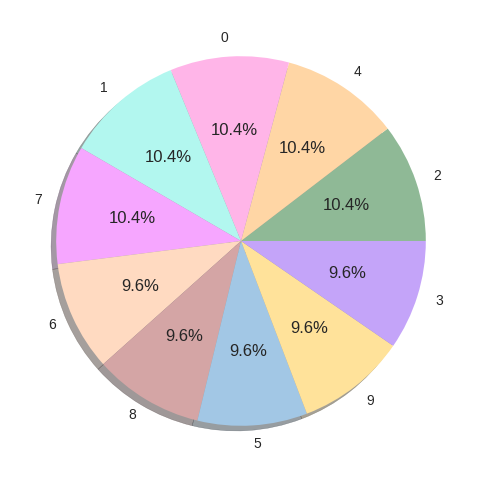

In [11]:
colors = ["#8FB996", "#FFD6A5", "#FFB5E8", "#B2F7EF", "#F6A6FF", "#FFDAC1", "#D4A5A5", "#A2C7E5", "#FFE29A", "#C4A4F9"]
class_valCount = df["class"].value_counts()

plt.pie(class_valCount.values,
        labels=class_valCount.index,
        autopct= '%1.1f%%',
        shadow=True,
        colors= colors
       )
plt.show()

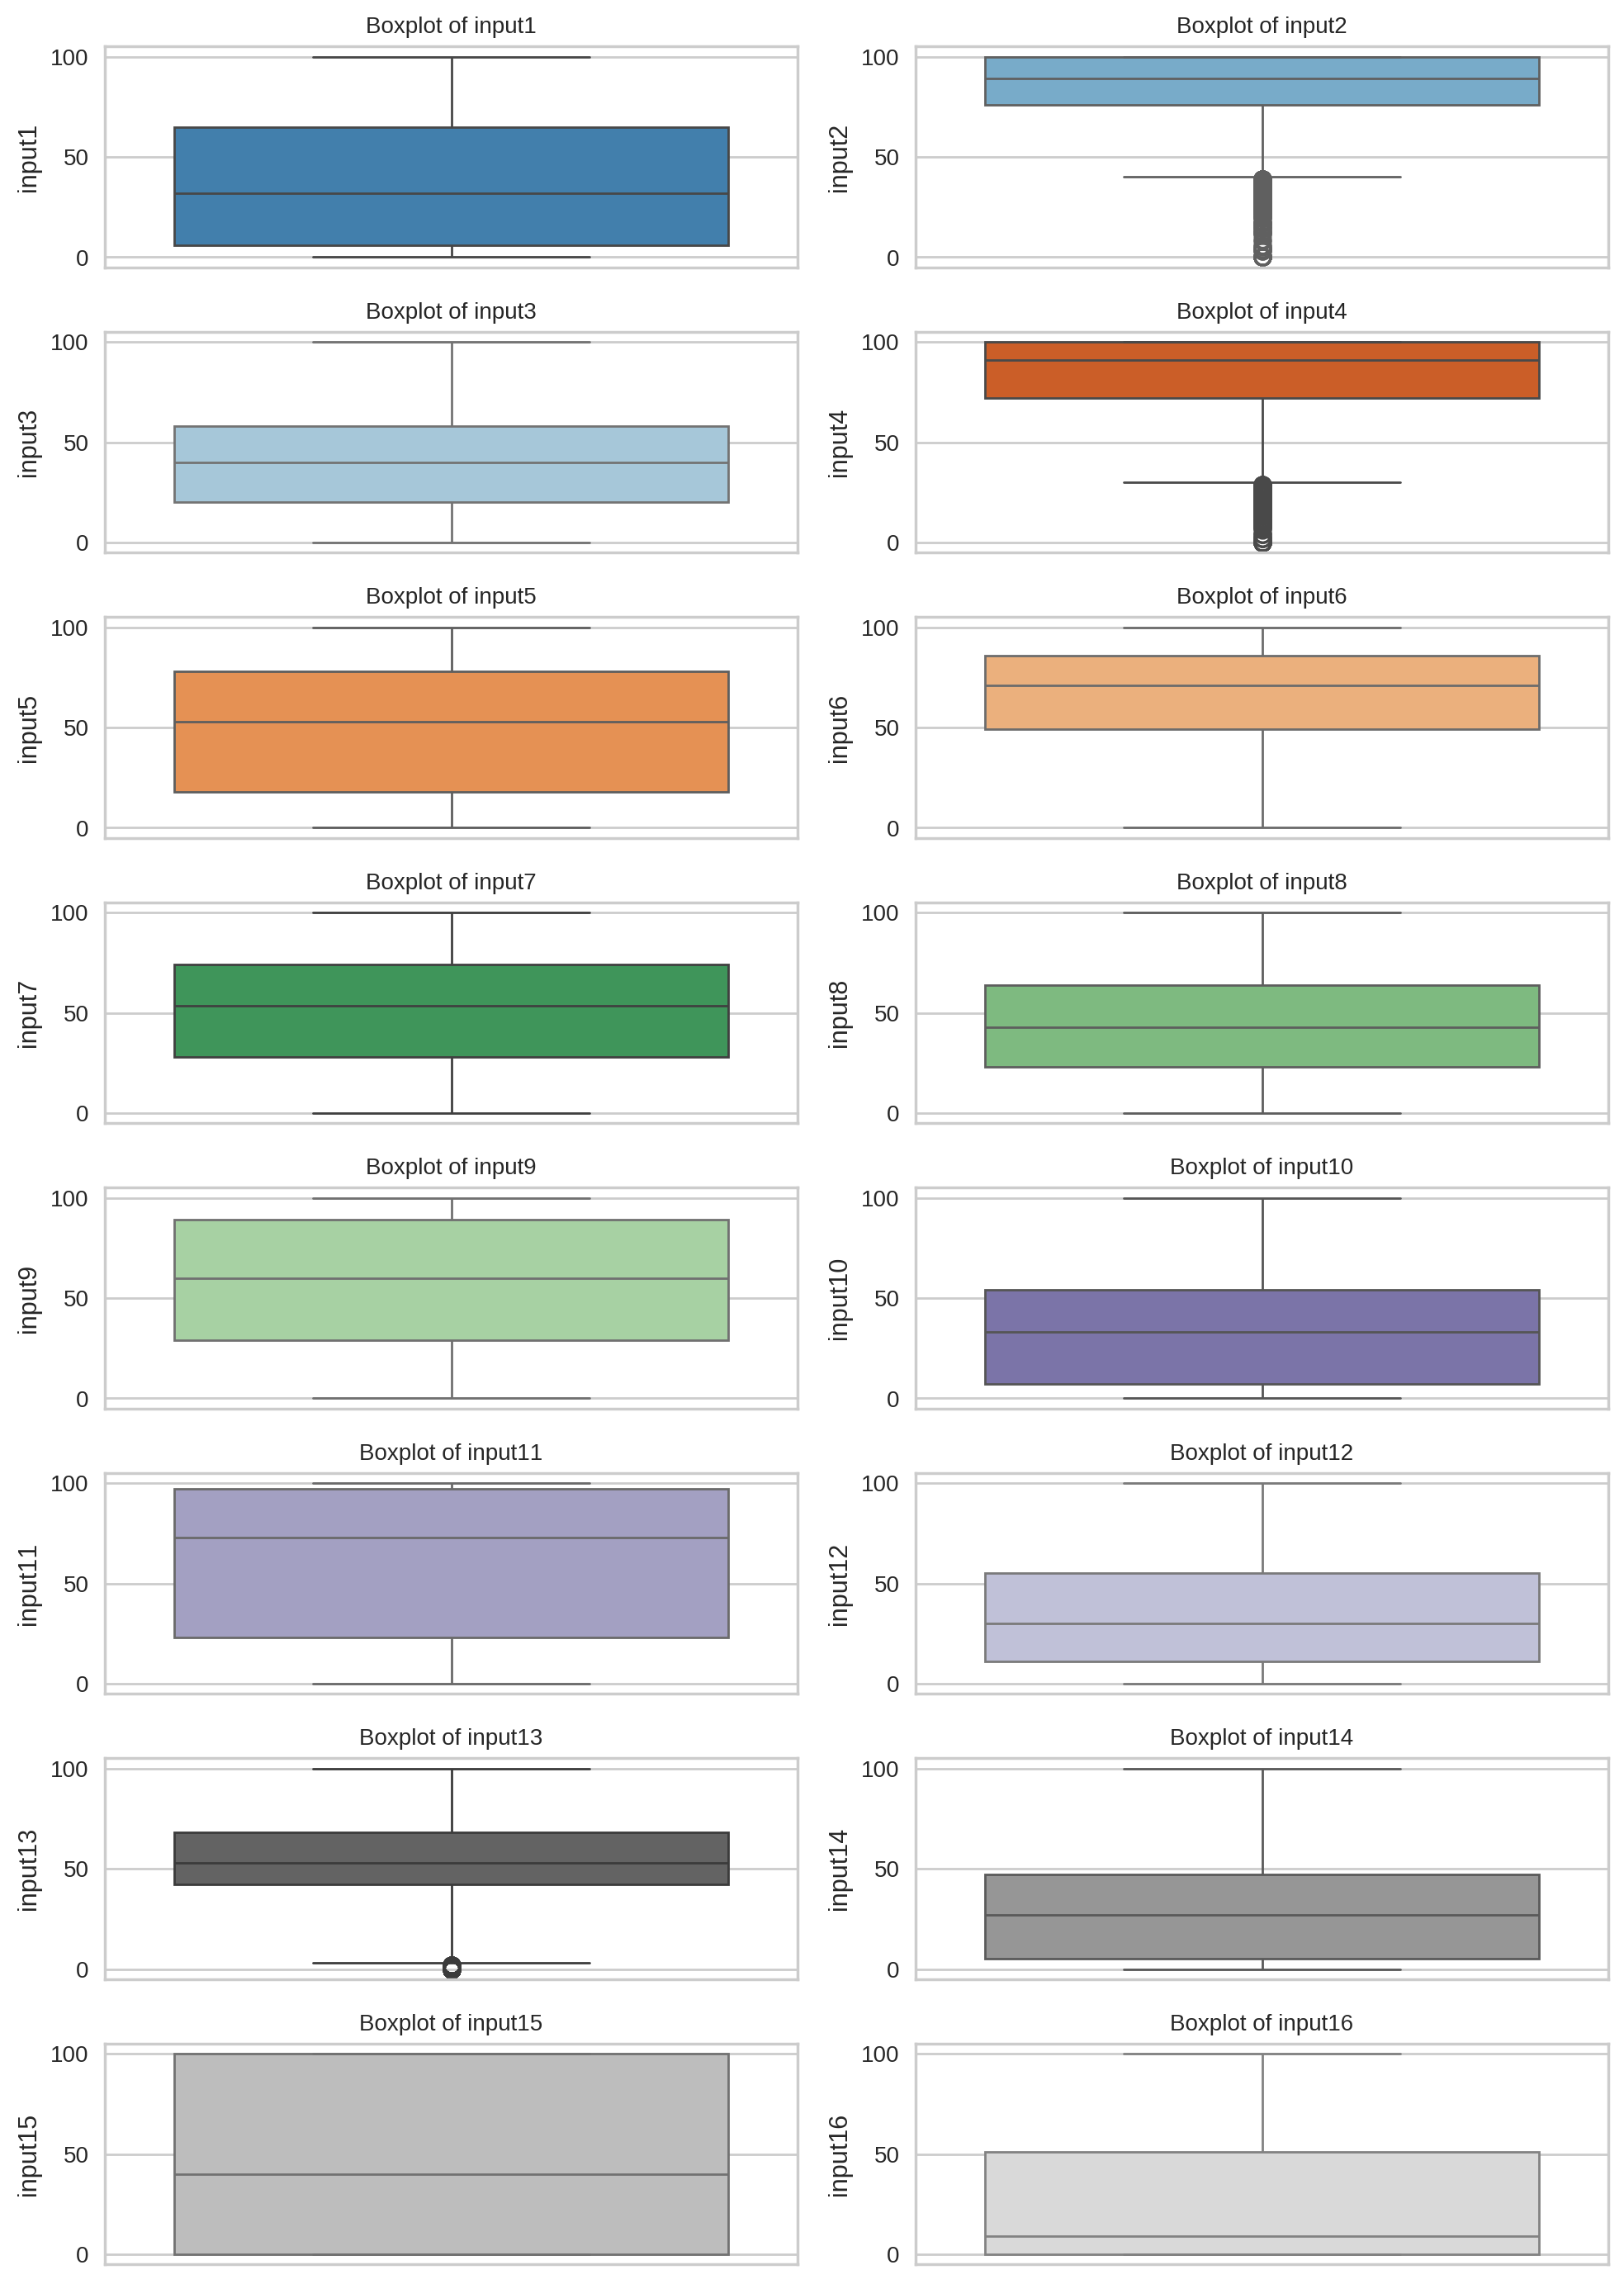

In [12]:
# cf.go_offline()
# df.iloc[:,:-1].iplot(kind="box")

# Using seaborn to plot boxplots for all features
import matplotlib.cm as cm
import seaborn as sns
import matplotlib.pyplot as plt

num_colors = len(df.columns[:-1])
colors = cm.get_cmap('tab20c', num_colors)
color_list = [colors(i) for i in range(num_colors)]

fig = plt.figure(figsize=(10, 14), dpi=200)

for i, col in enumerate(df.columns[:-1]):
    plt.subplot(8, 2, i + 1)
    sns.boxplot(y=df[col], color=color_list[i])
    plt.title(f"Boxplot of {col}", fontsize=10)

plt.tight_layout()
plt.show()

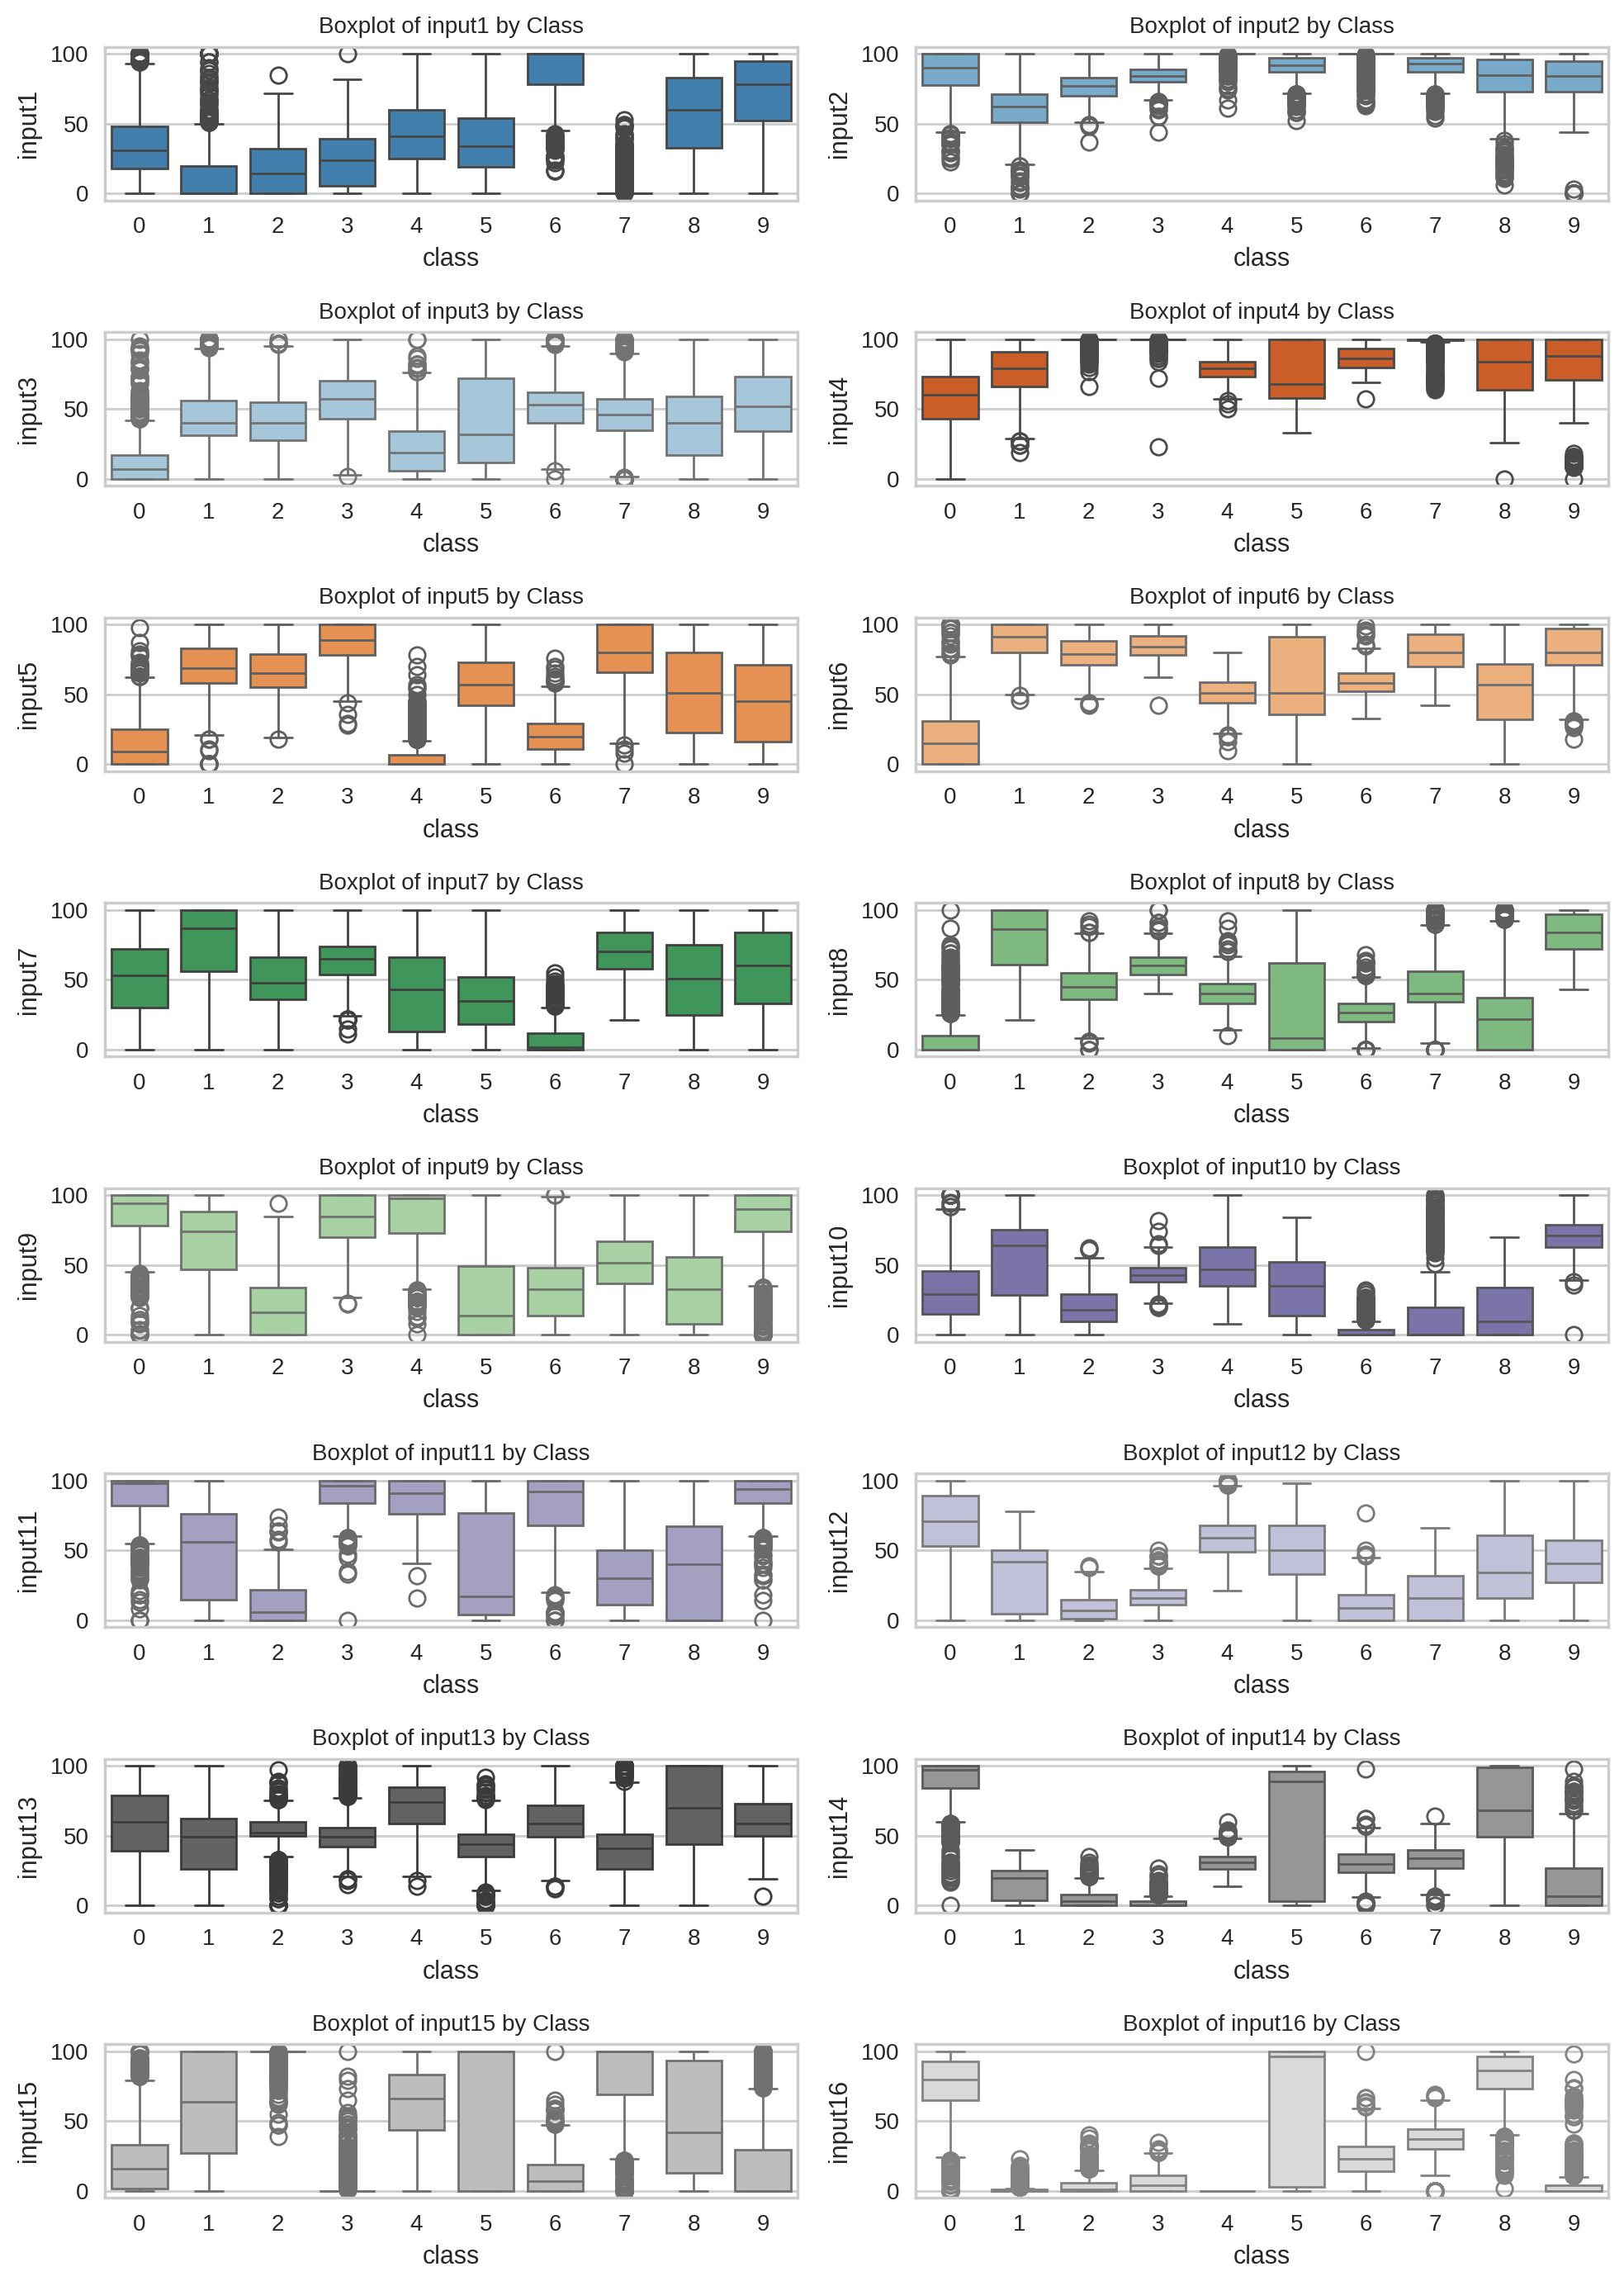

In [13]:
import matplotlib.cm as cm

num_colors = len(df.columns[:-1])
colors = cm.get_cmap('tab20c', num_colors)
color_list = [colors(i) for i in range(num_colors)]

fig = plt.figure(figsize=(10, 14), dpi=200)

for i, col in enumerate(df.columns[:-1]):
    plt.subplot(8, 2, i + 1)
    sns.boxplot(y=df[col], x=df["class"], data=df, color=color_list[i])
    plt.title(f"Boxplot of {col} by Class", fontsize=10)

plt.tight_layout()
plt.show()

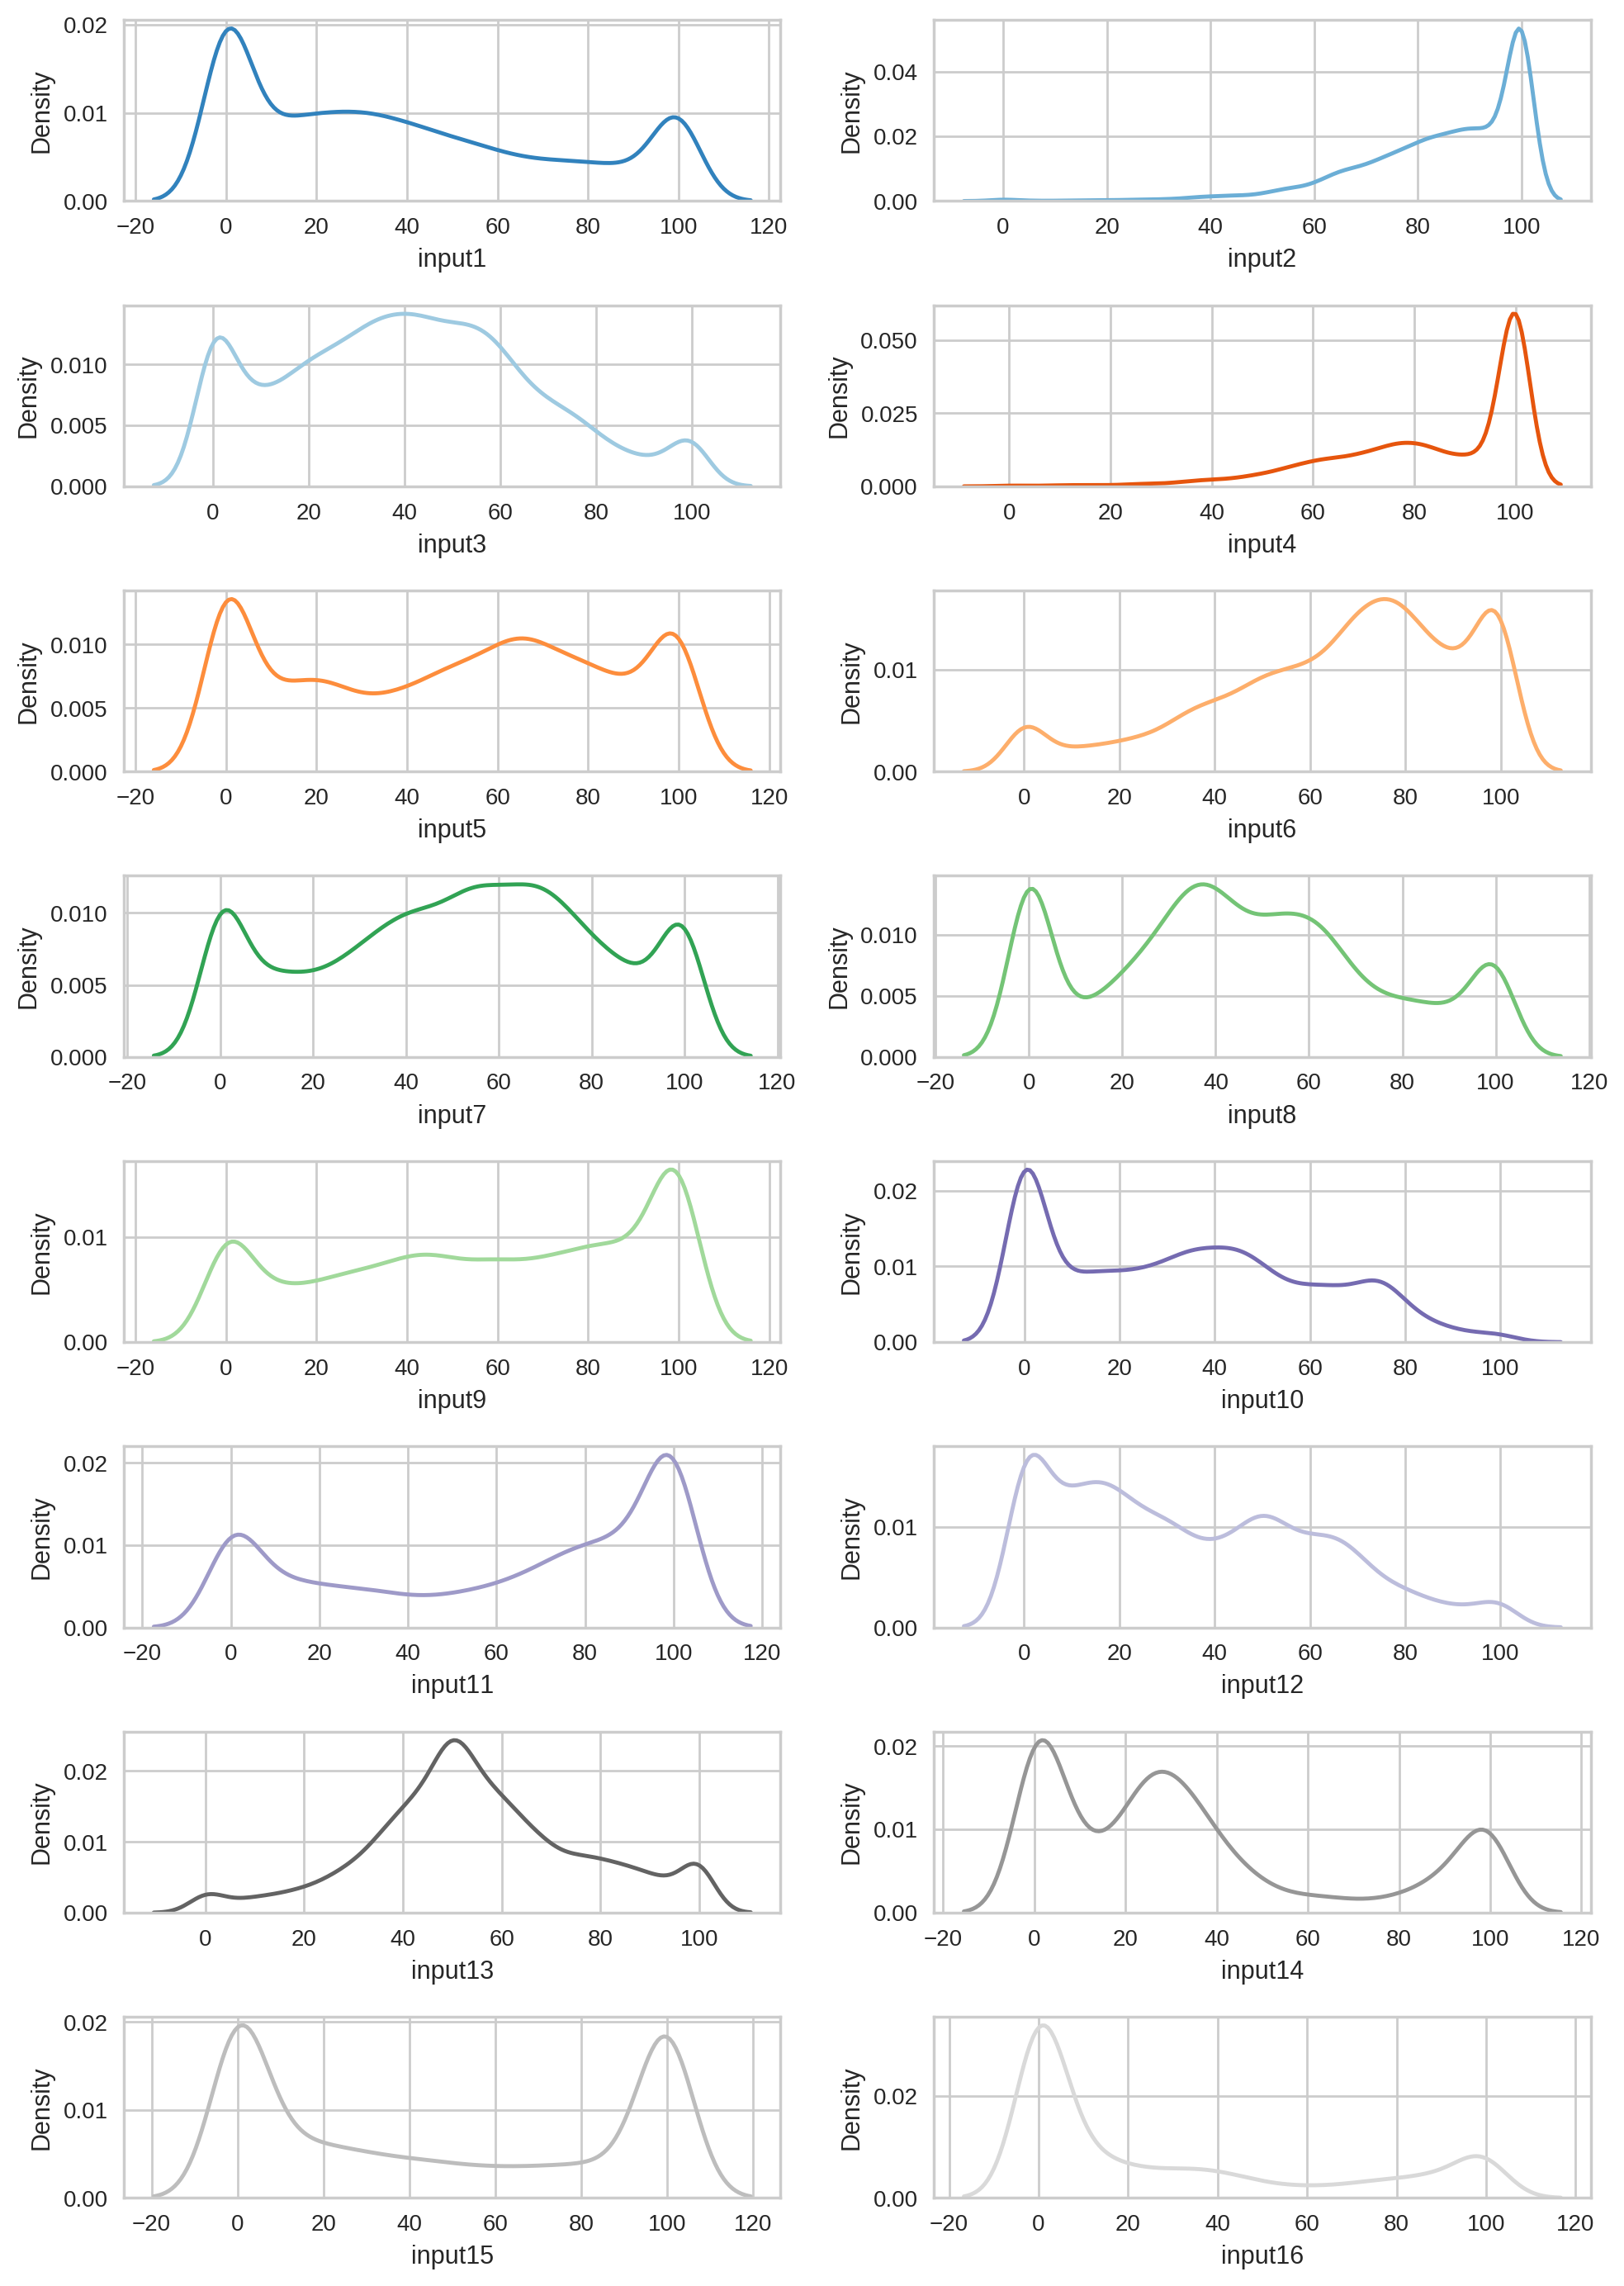

In [14]:
# Distributions of all Features;

num_colors = len(df.columns[:-1])
colors = cm.get_cmap('tab20c', num_colors)
color_list = [colors(i) for i in range(num_colors)]

fig = plt.figure(figsize=(10,14), dpi=200)
for i, col in enumerate(df.columns[:-1]):
        plt.subplot(8,2,i+1)
        sns.kdeplot(df[col], color=color_list[i])
plt.tight_layout();

In [15]:
def detect_outliers(df, col_name,tukey=1.5):
    '''
    this function detects outliers based on 1.5 time IQR and
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile

    upper_limit = third_quartile+(tukey*IQR)
    lower_limit = first_quartile-(tukey*IQR)
    outlier_count = 0

    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [16]:
threshold = 1.5
out_cols = []

for col in df.columns:
    print(
        f"{col}\nlower:{detect_outliers(df, col,threshold)[0]} \nupper:{detect_outliers(df, col,threshold)[1]}\
        \noutlier:{detect_outliers(df, col,threshold)[2]}\n*-*-*-*-*-*-*"
    )
    if detect_outliers(df, col,threshold)[2] > 0 :
        out_cols.append(col)
print(out_cols)

input1
lower:-82.5 
upper:153.5        
outlier:0
*-*-*-*-*-*-*
input2
lower:40.0 
upper:136.0        
outlier:196
*-*-*-*-*-*-*
input3
lower:-37.0 
upper:115.0        
outlier:0
*-*-*-*-*-*-*
input4
lower:30.0 
upper:142.0        
outlier:153
*-*-*-*-*-*-*
input5
lower:-72.0 
upper:168.0        
outlier:0
*-*-*-*-*-*-*
input6
lower:-6.5 
upper:141.5        
outlier:0
*-*-*-*-*-*-*
input7
lower:-41.0 
upper:143.0        
outlier:0
*-*-*-*-*-*-*
input8
lower:-38.5 
upper:125.5        
outlier:0
*-*-*-*-*-*-*
input9
lower:-61.0 
upper:179.0        
outlier:0
*-*-*-*-*-*-*
input10
lower:-63.5 
upper:124.5        
outlier:0
*-*-*-*-*-*-*
input11
lower:-88.0 
upper:208.0        
outlier:0
*-*-*-*-*-*-*
input12
lower:-55.0 
upper:121.0        
outlier:0
*-*-*-*-*-*-*
input13
lower:3.0 
upper:107.0        
outlier:208
*-*-*-*-*-*-*
input14
lower:-58.0 
upper:110.0        
outlier:0
*-*-*-*-*-*-*
input15
lower:-150.0 
upper:250.0        
outlier:0
*-*-*-*-*-*-*
input16
lower:-76.5 
upper:127.5

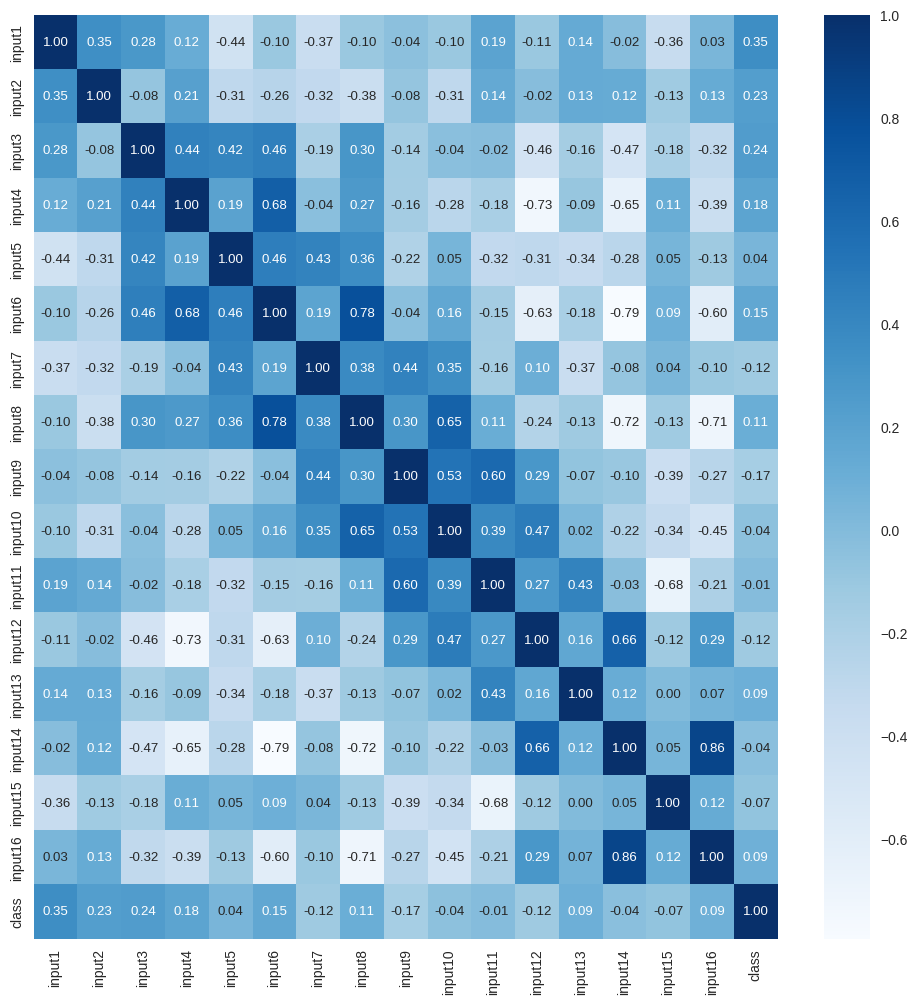

In [17]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, fmt='.2f', annot_kws={'size': 9.5}, cmap='Blues');

In [18]:
# It is good to save the data set as a csv file from time to time, especially after EDA, so that the notebook does not have to be run from scratch.

df.to_csv("handdigit.csv", index = False)

<h1 id="modeling" style="color: dimgray;">Modeling</h1>

<h2 id="m1" style="color: darkgray;">Train | Test Split</h2>

In [19]:
X = df.drop(columns=['class'])
y = df['class']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

In [21]:
# Display the shapes of the resulting datasets

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (9892, 16)
X_test shape: (1100, 16)
y_train shape: (9892,)
y_test shape: (1100,)


<h2 id="m2" style="color: darkgray;">Support Vector Machine Classifier (SVC)</h2>

In [22]:
param_grid = {"SVC__C": [0.001, 0.05, 0.01, 0.1],
             "SVC__gamma":["scale", "auto", 0.1, 0.2, 0.3],
             "SVC__kernel":["rbf", "linear"]}

In [23]:
operations = [("scaler", MinMaxScaler()), ("SVC", SVC(random_state =101, probability=True))]

svm_pipe = Pipeline(steps=operations)

svm = GridSearchCV(svm_pipe,
                   param_grid,
                   scoring ="accuracy",
                   cv=10,
                   n_jobs=-1
                  )

svm.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('SVC',
                                        SVC(probability=True,
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'SVC__C': [0.001, 0.05, 0.01, 0.1],
                         'SVC__gamma': ['scale', 'auto', 0.1, 0.2, 0.3],
                         'SVC__kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [24]:
svm.best_params_

{'SVC__C': 0.1, 'SVC__gamma': 'scale', 'SVC__kernel': 'rbf'}

In [25]:
svm.best_estimator_

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('SVC', SVC(C=0.1, probability=True, random_state=101))])

In [26]:
svm.best_score_

np.float64(0.9779611075364361)

In [27]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, digits=3))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred, digits=3))

In [28]:
eval_metric(svm, X_train, y_train, X_test, y_test)

Test_Set
[[105   0   0   0   0   0   0   0   1   0]
 [  0 103   7   0   0   0   0   0   0   0]
 [  0   1 119   0   0   0   0   0   0   0]
 [  0   0   0 115   0   0   0   0   0   1]
 [  0   0   0   0 115   3   1   0   0   0]
 [  0   0   0   2   0  95   0   0   0   2]
 [  0   0   0   0   0   0 105   0   0   0]
 [  0   4   0   0   0   0   0 106   0   0]
 [  0   0   0   0   0   0   0   0 104   0]
 [  0   0   0   0   0   0   0   2   0 109]]
              precision    recall  f1-score   support

           0      1.000     0.991     0.995       106
           1      0.954     0.936     0.945       110
           2      0.944     0.992     0.967       120
           3      0.983     0.991     0.987       116
           4      1.000     0.966     0.983       119
           5      0.969     0.960     0.964        99
           6      0.991     1.000     0.995       105
           7      0.981     0.964     0.972       110
           8      0.990     1.000     0.995       104
           9      0

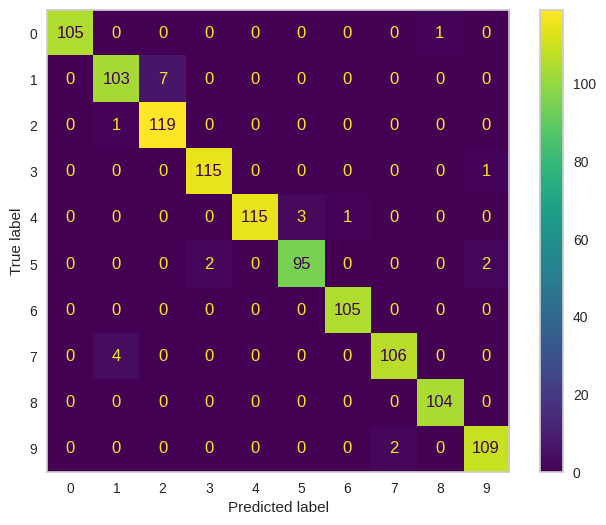

In [29]:
ConfusionMatrixDisplay.from_estimator(svm, X_test, y_test);
plt.grid(False)

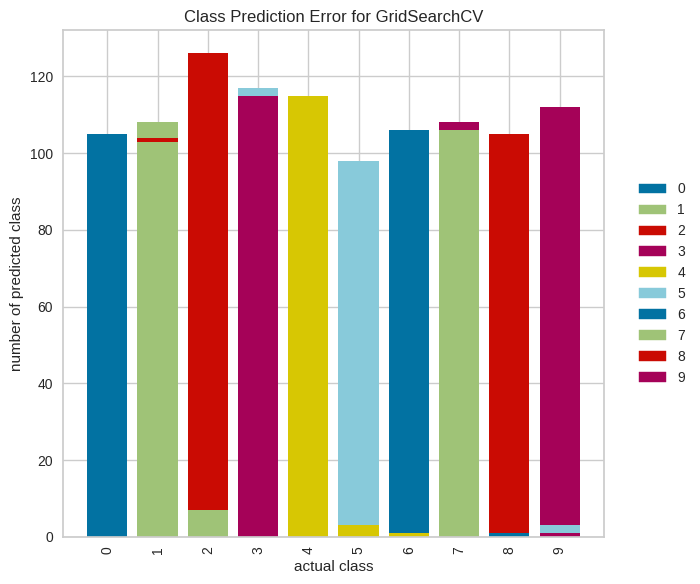

In [30]:
visualizer = ClassPredictionError(svm)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show();

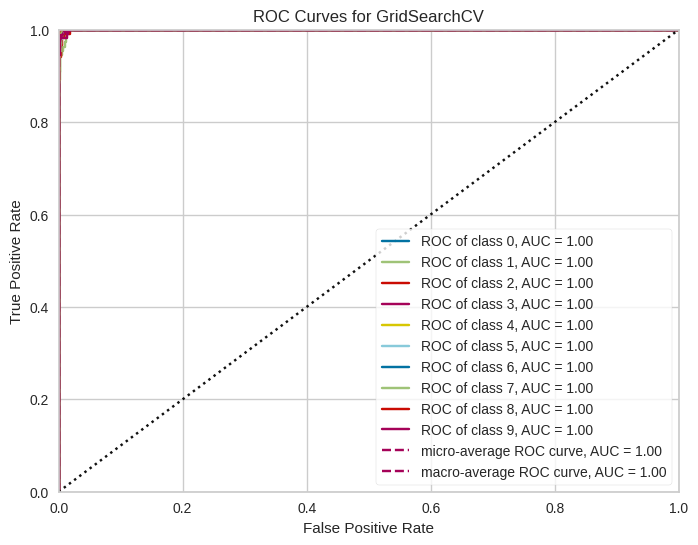

In [31]:
visualizer = ROCAUC(svm, classes=[str(i) for i in range(10)])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();                      # Finalize and render the figure

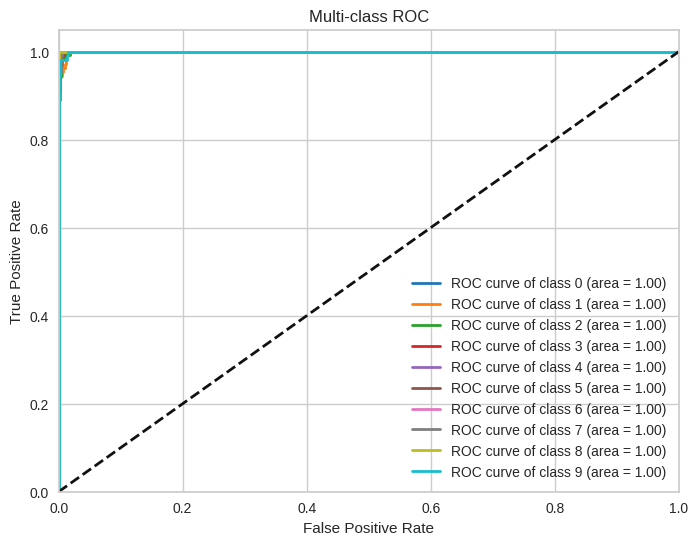

In [32]:
# Another way to plot ROC Curve

# Converting the target variable to binary format
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Modeling
operations = [("scaler", MinMaxScaler()), ("SVC", SVC(C=0.1, gamma='scale', kernel='rbf', random_state =101, probability=True))]
svm = Pipeline(steps=operations).fit(X_train, y_train)

# Getting the prediction probabilities
y_pred_proba = svm.predict_proba(X_test)

# Calculating ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting ROC Curve
colors = cycle(["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC')
plt.legend(loc="lower right")
plt.show()

<h2 id="m3" style="color: darkgray;">Decision Tree (DT) Classifier</h2>

In [33]:
param_grid = {"DT_model__splitter":["best", "random"],
              "DT_model__max_features":[None, "auto", "log2", 2, 3, 4,5,6, 7],
              "DT_model__max_depth": [None, 2, 3, 4],
              "DT_model__min_samples_leaf": [1, 2, 3, 4, 5, 6,7],
              "DT_model__min_samples_split": [2, 3, 5, 6, 7,8,9]}

In [34]:
operations = [("scaler", MinMaxScaler()), ("DT_model", DecisionTreeClassifier(random_state=101))]

dt_pipe = Pipeline(steps=operations)

dt = GridSearchCV(estimator=dt_pipe,
                          param_grid=param_grid,
                          scoring='accuracy',
                          cv=10,
                          n_jobs= -1,
                          return_train_score=True
                 )
dt.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('DT_model',
                                        DecisionTreeClassifier(random_state=101))]),
             n_jobs=-1,
             param_grid={'DT_model__max_depth': [None, 2, 3, 4],
                         'DT_model__max_features': [None, 'auto', 'log2', 2, 3,
                                                    4, 5, 6, 7],
                         'DT_model__min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'DT_model__min_samples_split': [2, 3, 5, 6, 7, 8, 9],
                         'DT_model__splitter': ['best', 'random']},
             return_train_score=True, scoring='accuracy')

In [35]:
dt.best_params_

{'DT_model__max_depth': None,
 'DT_model__max_features': None,
 'DT_model__min_samples_leaf': 1,
 'DT_model__min_samples_split': 3,
 'DT_model__splitter': 'best'}

In [36]:
dt.best_estimator_

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('DT_model',
                 DecisionTreeClassifier(min_samples_split=3,
                                        random_state=101))])

In [37]:
dt.best_score_

np.float64(0.9607762151341526)

In [38]:
eval_metric(dt, X_train, y_train, X_test, y_test)

Test_Set
[[106   0   0   0   0   0   0   0   0   0]
 [  0 105   5   0   0   0   0   0   0   0]
 [  0   2 117   0   0   0   0   1   0   0]
 [  0   4   0 111   0   0   0   0   0   1]
 [  0   0   0   0 117   1   1   0   0   0]
 [  0   0   0   5   0  90   1   1   1   1]
 [  2   1   0   0   0   0 100   0   2   0]
 [  0   7   3   0   0   1   0  98   1   0]
 [  1   0   0   0   0   0   0   0 103   0]
 [  0   0   0   2   0   3   1   1   0 104]]
              precision    recall  f1-score   support

           0      0.972     1.000     0.986       106
           1      0.882     0.955     0.917       110
           2      0.936     0.975     0.955       120
           3      0.941     0.957     0.949       116
           4      1.000     0.983     0.992       119
           5      0.947     0.909     0.928        99
           6      0.971     0.952     0.962       105
           7      0.970     0.891     0.929       110
           8      0.963     0.990     0.976       104
           9      0

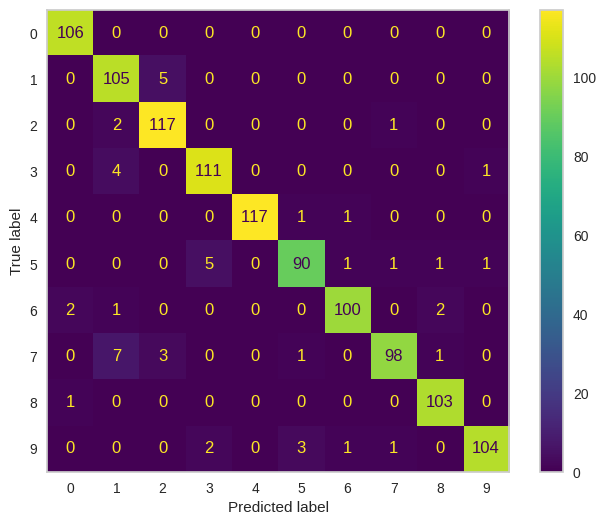

In [39]:
ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test);
plt.grid(False)

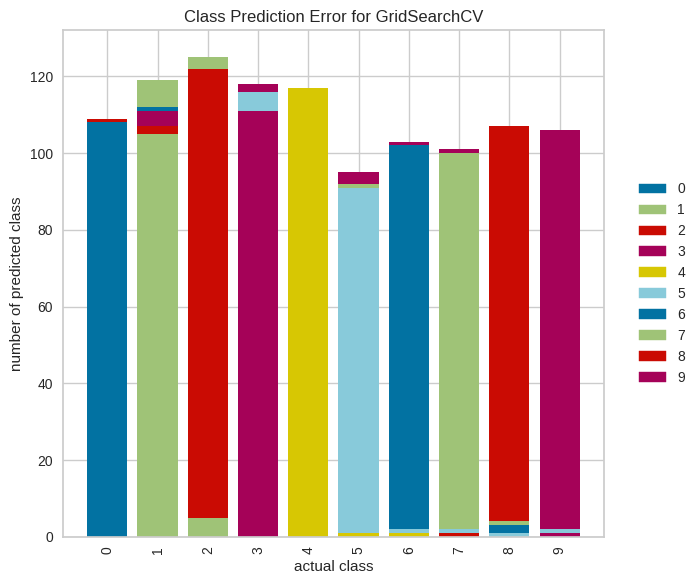

In [40]:
visualizer = ClassPredictionError(dt)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show();

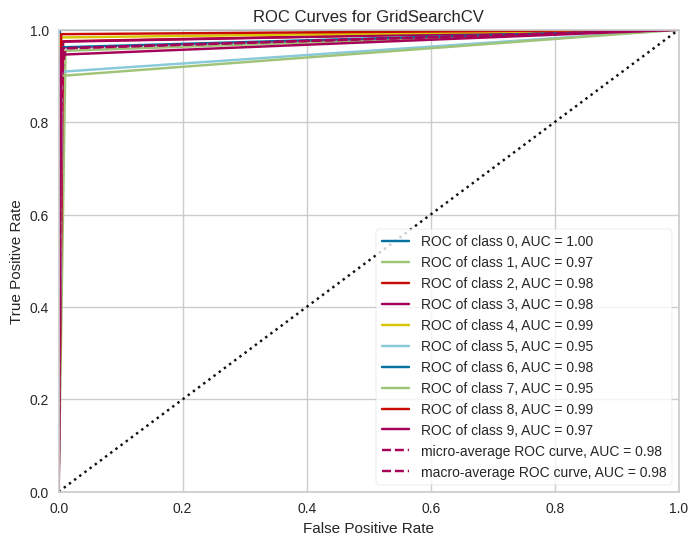

In [41]:
visualizer = ROCAUC(dt, classes=[str(i) for i in range(10)])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();                      # Finalize and render the figure

<h2 id="m4" style="color: darkgray;">Random Forest Classifier</h2>

In [42]:
param_grid = {'RF_model__n_estimators':[64, 128, 200],
             'RF_model__max_features':[2, 4, 'sqrt'],
             'RF_model__max_depth':[2, 3, 4],
             'RF_model__min_samples_split':[2, 3,4],
             'RF_model__min_samples_leaf': [2,3,4],
             'RF_model__max_samples':[0.8, 1]}

In [43]:
operations = [("scaler", MinMaxScaler()),
              ("RF_model", RandomForestClassifier(random_state=101))]

rf_pipe = Pipeline(steps=operations)

rf = GridSearchCV(rf_pipe,
                  param_grid,
                  scoring = "accuracy",
                  n_jobs = -1
                 )

rf.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('RF_model',
                                        RandomForestClassifier(random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, 3, 4],
                         'RF_model__max_features': [2, 4, 'sqrt'],
                         'RF_model__max_samples': [0.8, 1],
                         'RF_model__min_samples_leaf': [2, 3, 4],
                         'RF_model__min_samples_split': [2, 3, 4],
                         'RF_model__n_estimators': [64, 128, 200]},
             scoring='accuracy')

In [44]:
rf.best_params_

{'RF_model__max_depth': 4,
 'RF_model__max_features': 2,
 'RF_model__max_samples': 0.8,
 'RF_model__min_samples_leaf': 2,
 'RF_model__min_samples_split': 2,
 'RF_model__n_estimators': 64}

In [45]:
rf.best_estimator_

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('RF_model',
                 RandomForestClassifier(max_depth=4, max_features=2,
                                        max_samples=0.8, min_samples_leaf=2,
                                        n_estimators=64, random_state=101))])

In [46]:
eval_metric(rf, X_train, y_train, X_test, y_test)

Test_Set
[[ 97   0   0   0   0   0   1   0   8   0]
 [  0  71  36   3   0   0   0   0   0   0]
 [  0   5 114   1   0   0   0   0   0   0]
 [  0   3   0 113   0   0   0   0   0   0]
 [  0   1   0   0 117   0   0   0   0   1]
 [  0   0   0  23   0  58   0   0   0  18]
 [  0   0   0   0   0   0 105   0   0   0]
 [  0  13   1   2   0   1   0  89   0   4]
 [  5   0   0   0   0   0   0   1  98   0]
 [  0   7   0   3   1   0   0   0   0 100]]
              precision    recall  f1-score   support

           0      0.951     0.915     0.933       106
           1      0.710     0.645     0.676       110
           2      0.755     0.950     0.841       120
           3      0.779     0.974     0.866       116
           4      0.992     0.983     0.987       119
           5      0.983     0.586     0.734        99
           6      0.991     1.000     0.995       105
           7      0.989     0.809     0.890       110
           8      0.925     0.942     0.933       104
           9      0

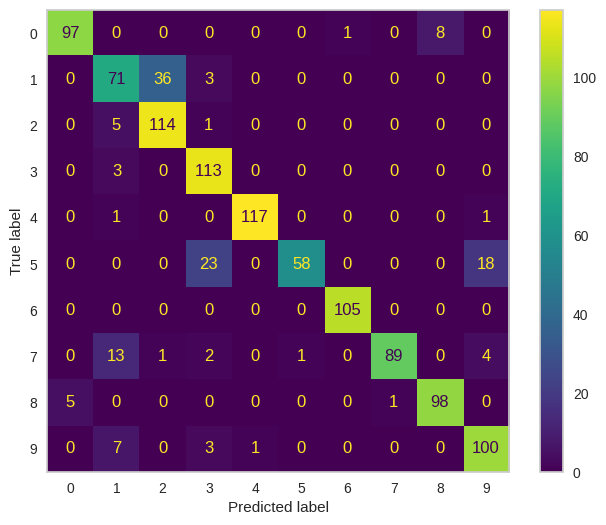

In [47]:
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test);
plt.grid(False)

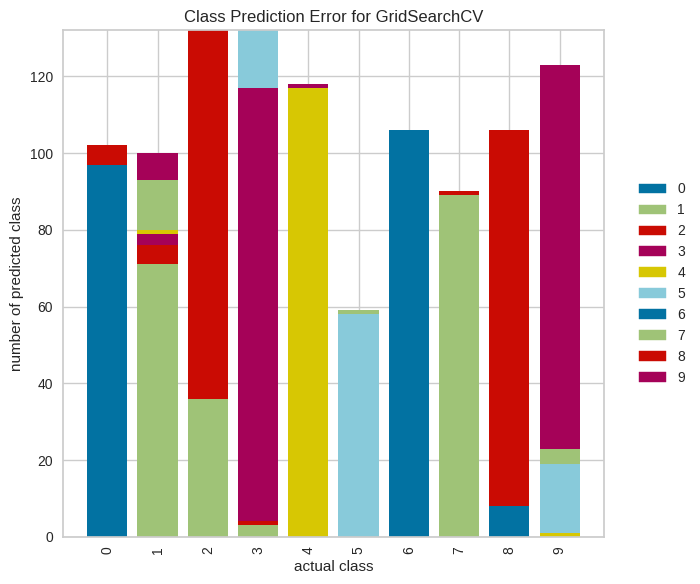

In [48]:
visualizer = ClassPredictionError(rf)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show();

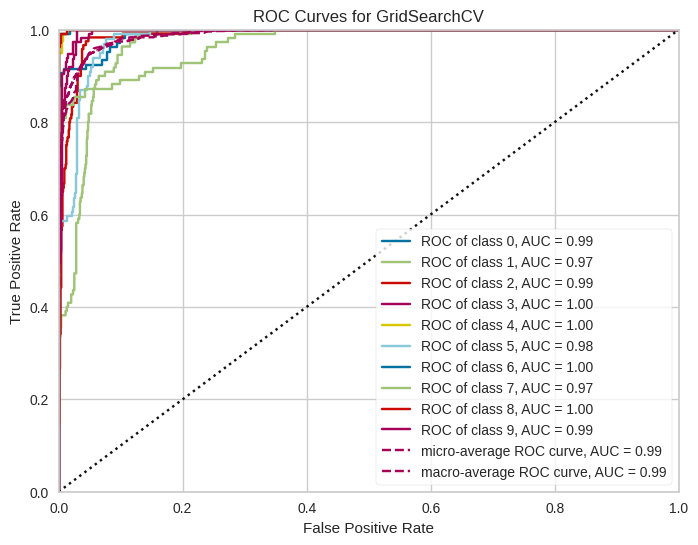

In [49]:
visualizer = ROCAUC(rf, classes=[str(i) for i in range(10)])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();                      # Finalize and render the figure

<h2 id="m5" style="color: darkgray;">Getting Scores To Compare Models</h2>

In [50]:
# Saving models

import pickle

# svm_model
pickle.dump(svm, open("svm_model", "wb"))

# dt_model
pickle.dump(dt, open("dt_model", "wb"))

# rf_model
pickle.dump(rf, open("rf_model", "wb"))

In [51]:
# Loading models using pickle

import pickle

# svm_model
svm = pickle.load(open("svm_model", "rb"))

# dt_model
dt = pickle.load(open("dt_model", "rb"))

# rf_model
rf = pickle.load(open("rf_model", "rb"))

In [52]:
# SVM Scores
y_pred_test = svm.predict(X_test)
y_pred_train = svm.predict(X_train)

svm_accuracy_test = accuracy_score(y_test, y_pred_test)
svm_accuracy_train = accuracy_score(y_train, y_pred_train)

svm_f1_test = f1_score(y_test, y_pred_test, average='macro')
svm_f1_train = f1_score(y_train, y_pred_train, average='macro')

svm_accuracy_test, svm_accuracy_train, svm_f1_test, svm_f1_train

(0.9781818181818182,
 0.9824100283057016,
 0.9782723432314062,
 0.9825418368028002)

In [53]:
# DT Scores
y_pred_test = dt.predict(X_test)
y_pred_train = dt.predict(X_train)

dt_accuracy_test = accuracy_score(y_test, y_pred_test)
dt_accuracy_train = accuracy_score(y_train, y_pred_train)

dt_f1_test = f1_score(y_test, y_pred_test, average='macro')
dt_f1_train = f1_score(y_train, y_pred_train, average='macro')

dt_accuracy_test, dt_accuracy_train, dt_f1_test, dt_f1_train

(0.9554545454545454, 0.9977759805903761, 0.9551534621425738, 0.997779715983419)

In [54]:
# RF Scores
y_pred_test = rf.predict(X_test)
y_pred_train = rf.predict(X_train)

rf_accuracy_test = accuracy_score(y_test, y_pred_test)
rf_accuracy_train = accuracy_score(y_train, y_pred_train)

rf_f1_test = f1_score(y_test, y_pred_test, average='macro')
rf_f1_train = f1_score(y_train, y_pred_train, average='macro')

rf_accuracy_test, rf_accuracy_train, rf_f1_test, rf_f1_train

(0.8745454545454545, 0.8752527294783664, 0.871092541919175, 0.8724115714486617)

<h1 id="compare-models" style="color: dimgray;">Comparing Models</h1>

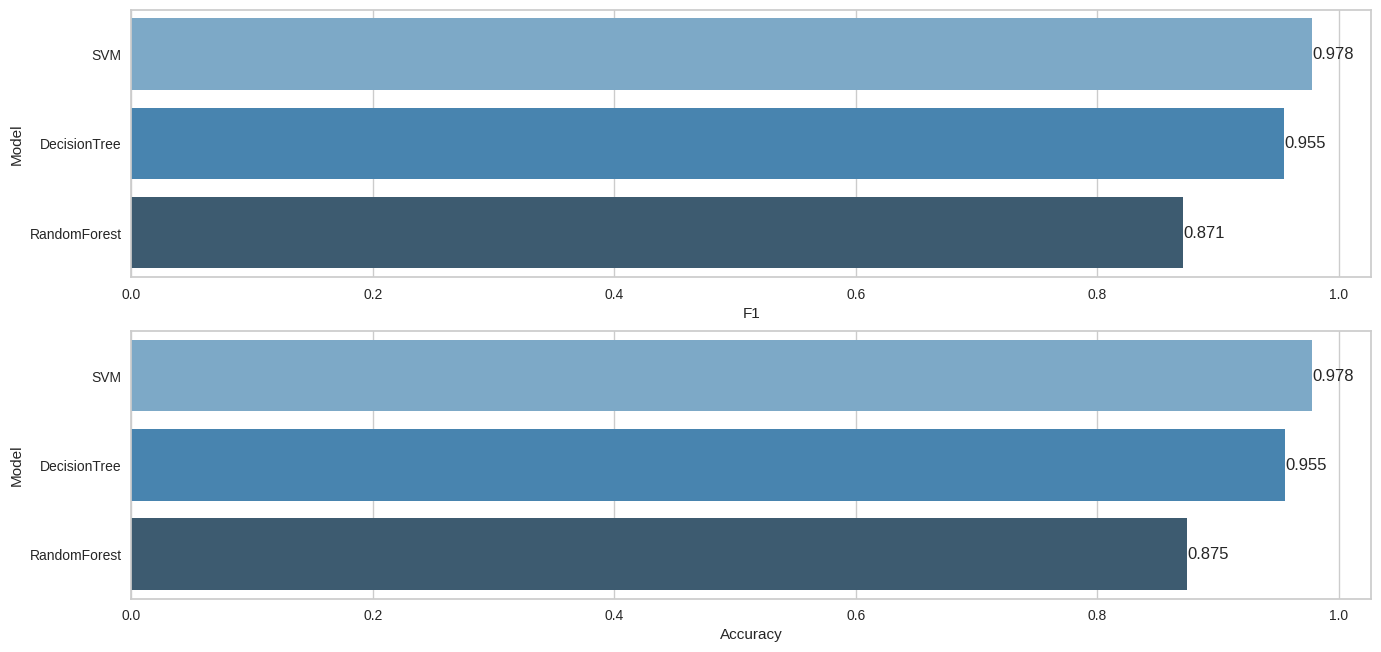

In [55]:
compare = pd.DataFrame({"Model": ["SVM", "DecisionTree", "RandomForest"],
                        "Accuracy": [svm_accuracy_test, dt_accuracy_test, rf_accuracy_test],
                        "F1": [svm_f1_test, dt_f1_test, rf_f1_test]
                       }
                      )

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment

plt.figure(figsize=(16,16))

plt.subplot(411)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(412)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.show()

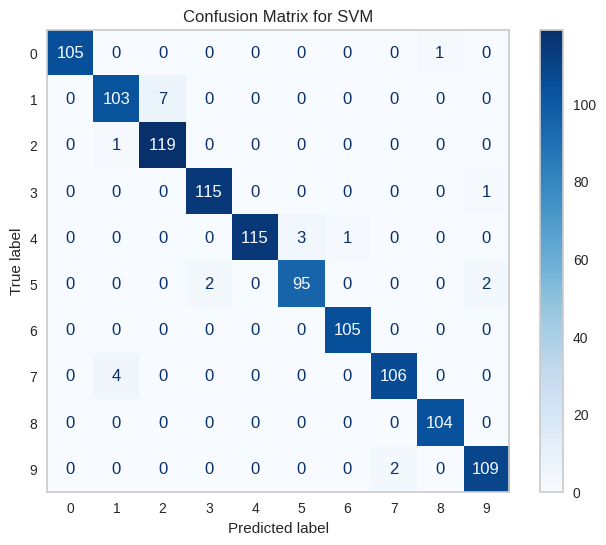

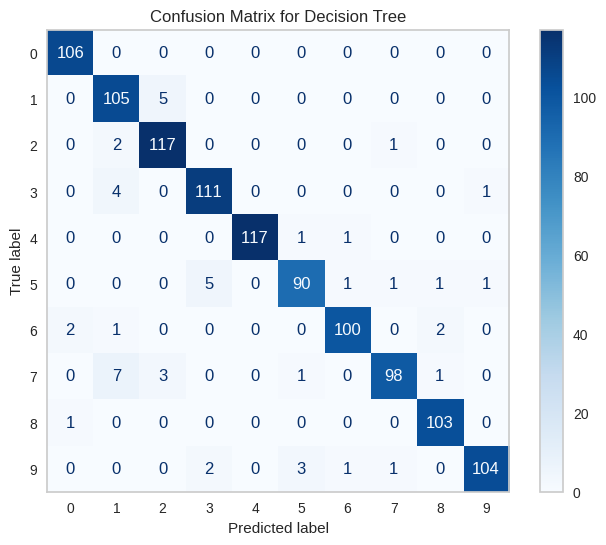

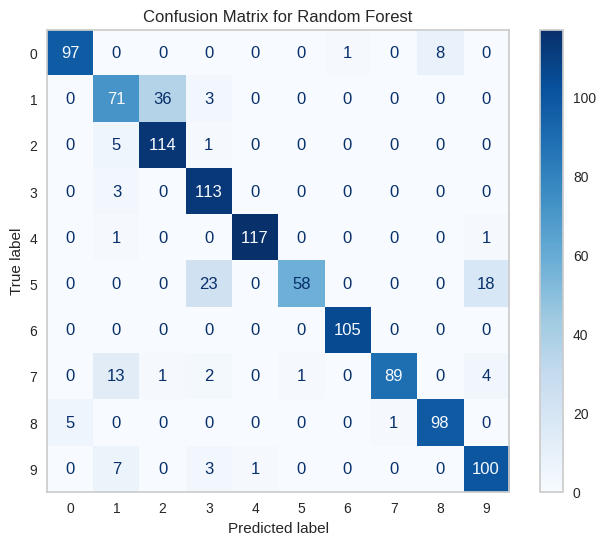

In [56]:
# Define models and their names
models = {
    'SVM': svm,
    'Decision Tree': dt,
    'Random Forest': rf.best_estimator_  # Using best model from GridSearchCV
}

# Iterate over each model in the 'models' dictionary
for name, model in models.items():
    # Predict the labels on the test set using the current model
    y_pred = model.predict(X_test)

    # Compute the confusion matrix by comparing the true labels (y_test) with the predicted labels (y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Create a ConfusionMatrixDisplay object to visualize the confusion matrix
    # 'display_labels' specifies the class labels to use in the visualization
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(i) for i in range(10)])

    # Plot the confusion matrix with a blue color map for better visual distinction
    disp.plot(cmap=plt.cm.Blues)

    # Set the title of the plot to indicate which model's confusion matrix is being displayed
    plt.title(f'Confusion Matrix for {name}')

    # Closing Grids
    plt.grid(False)

    # Show the plot on the screen
    plt.show()

My choice for the final model was **SVM (Support Vector Classifier)**.

Because:
- It has the highest accuracy.
- Prediction errors in confusion matrix are lower than other models.
- Its performance seems more reliable compared to others.

<h1 id="final-model" style="color: dimgray;">Final Model & Prediction</h1>

<h2 id="fm1" style="color: darkgray;">Final Model</h2>

In [61]:
print({'SVC__C': 0.1, 'SVC__gamma': 'scale', 'SVC__kernel': 'rbf'})

{'SVC__C': 0.1, 'SVC__gamma': 'scale', 'SVC__kernel': 'rbf'}


In [62]:
operations = [("scaler", MinMaxScaler()), ("SVC", SVC(C=0.1, gamma='scale', kernel='rbf', random_state =101, probability=True))]

final_model = Pipeline(steps=operations)

final_model.fit(X, y)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('SVC', SVC(C=0.1, probability=True, random_state=101))])

In [63]:
# saving final model
import pickle
pickle.dump(final_model, open("final_model", "wb"))

<h2 id="fm2" style="color: darkgray;">Prediction</h2>

In [64]:
# loading final_model file
new_model = pickle.load(open("final_model", "rb"))

In [65]:
my_dict = {
    "input1": [35, 0, 49, 81, 25, 0, 100, 77, 40, 63],
    "input2": [92, 97, 78, 78, 90, 97, 82, 59, 100, 93],
    "input3": [35, 42, 87, 42, 67, 75, 48, 0, 62, 100],
    "input4": [100, 100, 53, 71, 94, 84, 94, 95, 88, 100],
    "input5": [100, 67, 75, 49, 19, 93, 47, 55, 71, 35],
    "input6": [47, 59, 80, 54, 69, 93, 92, 76, 0, 59],
    "input7": [29, 75, 62, 38, 24, 90, 39, 49, 28, 52],
    "input8": [33, 28, 22, 100, 38, 45, 8, 86, 42, 51],
    "input9": [24, 29, 29, 59, 53, 42, 43, 51, 78, 44],
    "input10": [44, 35, 73, 36, 54, 14, 21, 7, 33, 0],
    "input11": [27, 52, 100, 42, 100, 32, 100, 100, 9, 56],
    "input12": [59, 12, 1, 42, 52, 8, 0, 71, 43, 78],
    "input13": [45, 88, 23, 65, 42, 32, 41, 81, 52, 45],
    "input14": [36, 47, 0, 14, 64, 19, 17, 63, 49, 0],
    "input15": [0, 52, 48, 0, 48, 52, 0, 0, 82, 30],
    "input16": [26, 0, 79, 2, 0, 0, 27, 15, 9, 15]
}

new_data = pd.DataFrame(my_dict)
new_data

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16
0,35,92,35,100,100,47,29,33,24,44,27,59,45,36,0,26
1,0,97,42,100,67,59,75,28,29,35,52,12,88,47,52,0
2,49,78,87,53,75,80,62,22,29,73,100,1,23,0,48,79
3,81,78,42,71,49,54,38,100,59,36,42,42,65,14,0,2
4,25,90,67,94,19,69,24,38,53,54,100,52,42,64,48,0
5,0,97,75,84,93,93,90,45,42,14,32,8,32,19,52,0
6,100,82,48,94,47,92,39,8,43,21,100,0,41,17,0,27
7,77,59,0,95,55,76,49,86,51,7,100,71,81,63,0,15
8,40,100,62,88,71,0,28,42,78,33,9,43,52,49,82,9
9,63,93,100,100,35,59,52,51,44,0,56,78,45,0,30,15


In [66]:
prediction = new_model.predict(new_data)
prediction

array([7, 7, 8, 9, 4, 7, 6, 9, 4, 5])

In [67]:
new_data['prediction'] = prediction
new_data

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16,prediction
0,35,92,35,100,100,47,29,33,24,44,27,59,45,36,0,26,7
1,0,97,42,100,67,59,75,28,29,35,52,12,88,47,52,0,7
2,49,78,87,53,75,80,62,22,29,73,100,1,23,0,48,79,8
3,81,78,42,71,49,54,38,100,59,36,42,42,65,14,0,2,9
4,25,90,67,94,19,69,24,38,53,54,100,52,42,64,48,0,4
5,0,97,75,84,93,93,90,45,42,14,32,8,32,19,52,0,7
6,100,82,48,94,47,92,39,8,43,21,100,0,41,17,0,27,6
7,77,59,0,95,55,76,49,86,51,7,100,71,81,63,0,15,9
8,40,100,62,88,71,0,28,42,78,33,9,43,52,49,82,9,4
9,63,93,100,100,35,59,52,51,44,0,56,78,45,0,30,15,5
